In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

Importing DataSet

In [ ]:
df=pd.read_csv('/content/Train_Fraud_Detection.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.shape

(12258, 23)

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

Removing Null places in data set file

In [ ]:
df.replace('', np.nan, inplace=True)
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

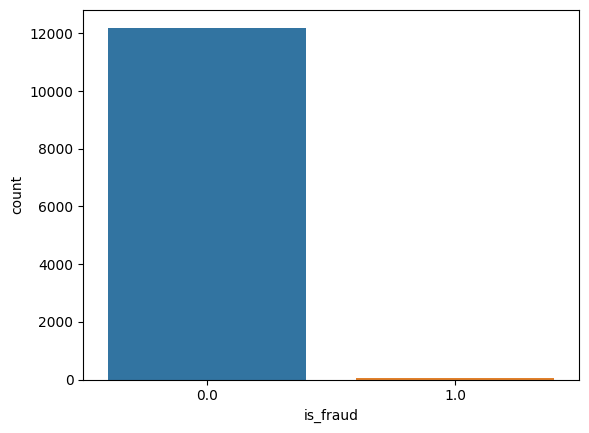

In [ ]:
sns.countplot(x=df.is_fraud)

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.010536,0.017407,-0.012814,-0.006011,0.011473,0.010376,0.994787,-0.006264,0.011528,0.009947
cc_num,0.010536,1.000000,-0.005692,0.046457,-0.074817,-0.059313,-0.008579,0.010662,-0.075854,-0.059529,-0.021919
amt,0.017407,-0.005692,1.000000,0.007124,0.041547,-0.026086,-0.000174,0.017967,0.041732,-0.025872,0.247630
zip,-0.012814,0.046457,0.007124,1.000000,-0.102043,-0.900617,0.073002,-0.013789,-0.100988,-0.899999,0.021571
lat,-0.006011,-0.074817,0.041547,-0.102043,1.000000,-0.036656,-0.162262,-0.005021,0.993791,-0.036147,0.073447
long,0.011473,-0.059313,-0.026086,-0.900617,-0.036656,1.000000,-0.040730,0.011202,-0.036638,0.999187,-0.080031
city_pop,0.010376,-0.008579,-0.000174,0.073002,-0.162262,-0.040730,1.000000,0.010378,-0.161917,-0.041097,0.024383
unix_time,0.994787,0.010662,0.017967,-0.013789,-0.005021,0.011202,0.010378,1.000000,-0.005381,0.011240,0.009654
merch_lat,-0.006264,-0.075854,0.041732,-0.100988,0.993791,-0.036638,-0.161917,-0.005381,1.000000,-0.036144,0.074414
merch_long,0.011528,-0.059529,-0.025872,-0.899999,-0.036147,0.999187,-0.041097,0.011240,-0.036144,1.000000,-0.079844


<ipython-input-9-a81610cc0994>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['is_fraud'].plot(kind='bar',fig=(7,4))


<Axes: >

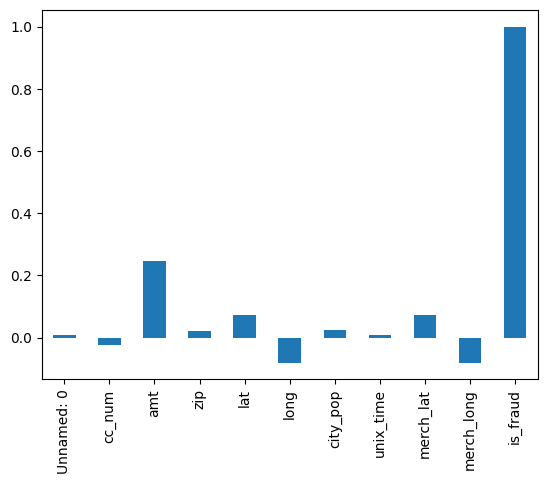

In [ ]:
df.corr()['is_fraud'].plot(kind='bar',fig=(7,4))

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


<Axes: xlabel='count', ylabel='category'>

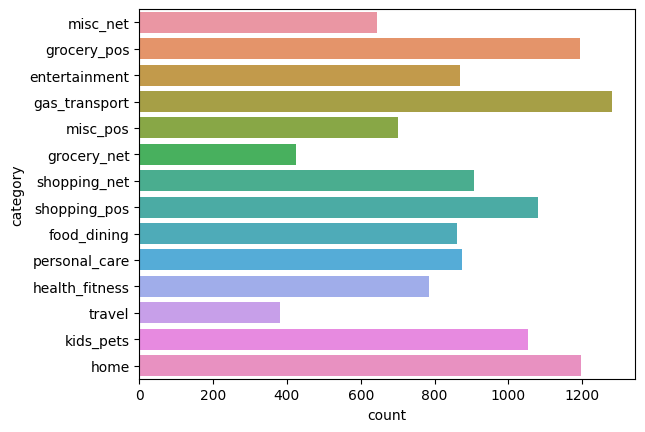

In [ ]:
sns.countplot(y=df.category)

Numbering Categories for Coding Purpose

In [ ]:
df[df['category']=='misc_net']=1
df[df['category']=='grocery_pos']=2
df[df['category']=='entertainment']=3
df[df['category']=='gas_transport']=4
df[df['category']=='misc_pos']=5
df[df['category']=='grocery_net']=6
df[df['category']=='shopping_net']=7
df[df['category']=='shopping_pos']=8
df[df['category']=='food_dining']=9
df[df['category']=='personal_care']=10
df[df['category']=='health_fitness']=11
df[df['category']=='travel']=12
df[df['category']=='kids_pets']=13
df[df['category']=='home']=14
df[df['gender']=='F']==1
df[df['gender']=='M']==0

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


Train Test Split

In [ ]:
X= df.drop(["trans_date_trans_time","first","last","street","city","state","zip","job","dob","trans_num","unix_time","merchant","is_fraud"], axis='columns')
y = df.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(9805, 10) (2452, 10) (9805,) (2452,)


In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Using Logistic Regression Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 100.0


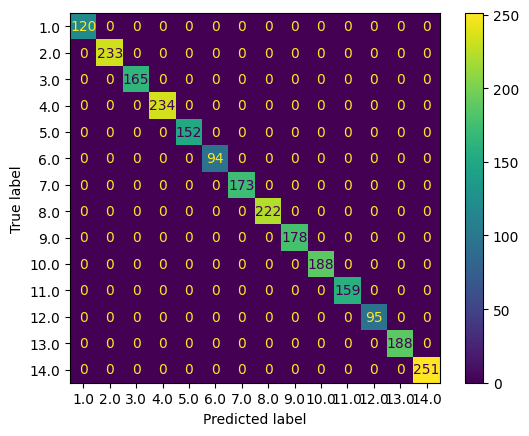

In [ ]:
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)
y_prediction=lg_model.predict(X_test)
print("Accuracy:",(accuracy_score(y_test,y_prediction))*100)
ConfusionMatrixDisplay.from_predictions(y_test,y_prediction)
plt.show()

Detecting Credit Card Fraud by taking Input from User

In [ ]:
n1=int(input('Enter ID'))
n2=int(input('Enter cc_num'))
n3=int(input('Enter Category'))
n4=float(input('Enter Amount'))
n5=int(input('Enter Gender'))
n6=float(input('Enter lat'))
n7=float(input('Enter long'))
n8=int(input('Enter city pop'))
n9=float(input('Enter merch_lat'))
n10=float(input('Enter merch_long'))


i=(n1,n2,n3,n4,n5,n6,n7,n8,n9,n10)

nparray=np.asarray(i)
reshapedArray=nparray.reshape(1,-1)

inputdata=sc.transform(reshapedArray)
y_prediction=lg_model.predict(inputdata)

if y_prediction[0]==0:
  print("No Fraud Detected")
else:
  print("Fraud Detected")

Enter ID1
Enter cc_num12
Enter Category3
Enter Amount123.56
Enter Gender1
Enter lat12.45
Enter long89.67
Enter city pop3
Enter merch_lat45.89
Enter merch_long34.145
Fraud Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
